**Problem Statement**: Customer Segmentation Analysis

*You own the mall and want to understand the customers who can quickly
converge [Target Customers] so that the insight can be given to the
marketing team and plan the strategy accordingly.*

Import necessary dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading dataset

In [2]:
data = pd.read_csv(r'/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

(i) Univariate Analysis

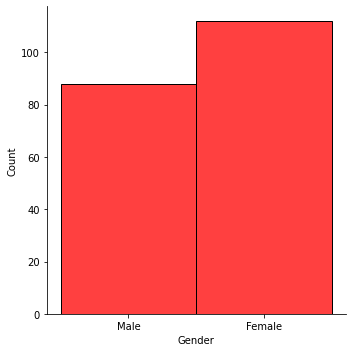

In [4]:
sns.displot(data["Gender"], color='red')

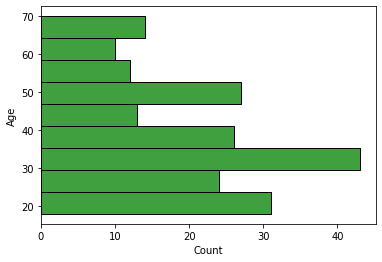

In [5]:
sns.histplot(y = data["Age"], color='green')

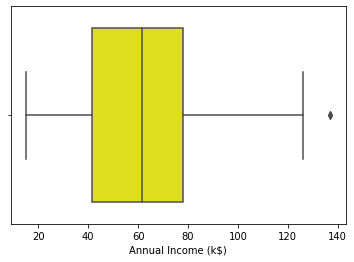

In [6]:
sns.boxplot(x = data["Annual Income (k$)"], color='yellow')

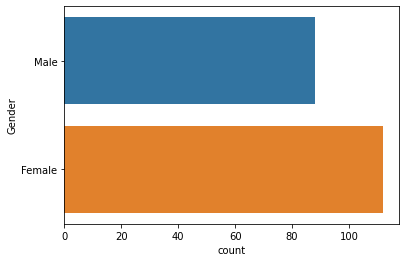

In [7]:
sns.countplot(y = data["Gender"])

(ii) Bi-Variate Analysis

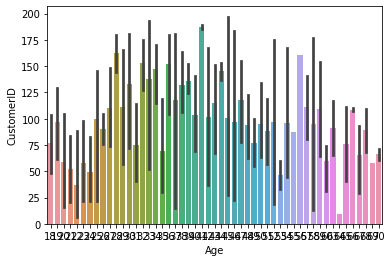

In [8]:
sns.barplot(y=data['CustomerID'],x=data['Age'])

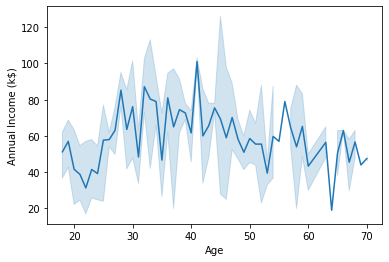

In [9]:
sns.lineplot(y=data['Annual Income (k$)'],x=data['Age'])

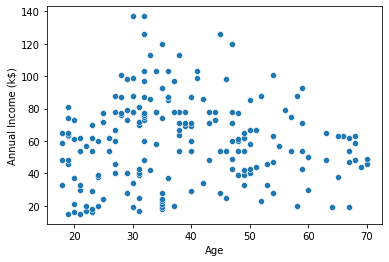

In [10]:
sns.scatterplot(y=data['Annual Income (k$)'],x=data['Age'])

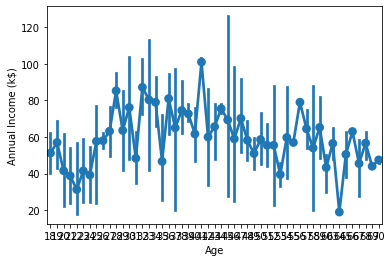

In [11]:
sns.pointplot(y=data['Annual Income (k$)'],x=data['Age'])

In [12]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

(iii) Multi-Variate Analysis

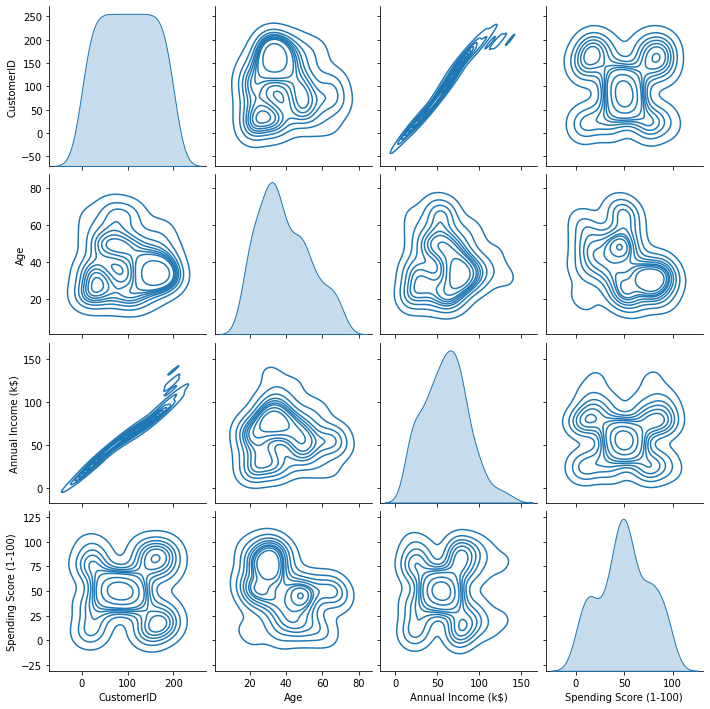

In [13]:
sns.pairplot(data=data[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']],kind="kde")

Descriptive Statistics

In [14]:
data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


Handling missing values



In [15]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
import warnings
warnings.filterwarnings('ignore')
outliers=data.quantile(q=(0.25,0.75))
outliers

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [18]:
a = data['Annual Income (k$)'].quantile(0.25)
b = data['Annual Income (k$)'].quantile(0.75)
c = b - a
lower_limit = a - 1.5 * c
data.median(numeric_only=True)

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

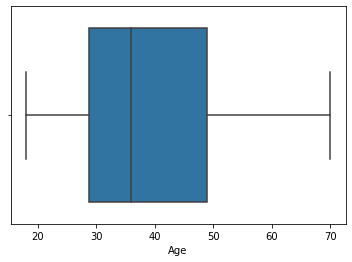

In [19]:
data['Annual Income (k$)'] = np.where(data['Annual Income (k$)'] < lower_limit, 7, data['Annual Income (k$)'])
sns.boxplot(x=data.Age,showfliers = False)

Categorical columns and Label encoding

In [20]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data.Gender = lb.fit_transform(data.Gender)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Scaling the data

In [22]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
data_scaled = scale.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959


Clustering

In [23]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
y_pred = km.fit_predict(data_scaled)
data_scaled['cluster'] = y_pred
data_scaled['cluster'].value_counts()

1    112
0     88
Name: cluster, dtype: int64

Split the data into training and testing

In [24]:
X = data_scaled.drop(columns=["cluster"],axis=1)
y = data_scaled["cluster"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(160, 5) (40, 5)
(160,) (40,)


In [27]:
X_train.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
91,0.457286,1.0,0.000000,0.360656,0.408163
60,0.301508,1.0,1.000000,0.254098,0.561224
41,0.206030,1.0,0.115385,0.188525,0.928571
93,0.467337,0.0,0.423077,0.368852,0.397959
103,0.517588,1.0,0.153846,0.385246,0.551020


In [28]:
X_test.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
92,0.462312,1.0,0.576923,0.368852,0.489796
43,0.216080,0.0,0.250000,0.196721,0.612245
9,0.045226,0.0,0.230769,0.032787,0.724490
117,0.587940,0.0,0.596154,0.409836,0.591837
186,0.934673,0.0,0.692308,0.704918,0.234694


In [29]:
y_train.head()

91     0
60     0
41     0
93     1
103    0
Name: cluster, dtype: int32

In [30]:
y_test.head()

92     0
43     1
9      1
117    1
186    1
Name: cluster, dtype: int32

Build the Model

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40,criterion='entropy')

In [32]:
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

Train the Model

In [33]:
y_predict_train = model.predict(X_train)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training Accuracy: ',accuracy_score(y_train,y_predict_train))

Training Accuracy:  1.0


Test the Model

In [34]:
print('Testing accuracy: ',accuracy_score(y_test,y_predict))

Testing accuracy:  1.0


Evaluation Metrics

In [35]:
pd.crosstab(y_test,y_predict)

col_0,0,1
cluster,,
0,18,0
1,0,22


In [36]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        22

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



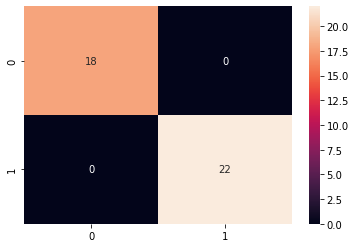

In [37]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()